In [ ]:
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn import tree

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train.head(10) #View dataset

employee_id         department  ... avg_training_score is_promoted
0        65438  Sales & Marketing  ...                 49           0
1        65141         Operations  ...                 60           0
2         7513  Sales & Marketing  ...                 50           0
3         2542  Sales & Marketing  ...                 50           0
4        48945         Technology  ...                 73           0
5        58896          Analytics  ...                 85           0
6        20379         Operations  ...                 59           0
7        16290         Operations  ...                 63           0
8        73202          Analytics  ...                 83           0
9        28911  Sales & Marketing  ...                 54           0

[10 rows x 14 columns]

In [ ]:
train.info() #Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
display(train.isnull().sum()) #Null values
train.education.unique() 
print('Mode of Education: '+str(train["education"].mode()))

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Mode of Education: 0    Bachelor's
dtype: object


In [ ]:
#Imputation
pyr_impute = SimpleImputer()

data_with_imputed_values = pyr_impute.fit_transform(np.array(train['previous_year_rating']).reshape(-1,1))
train['previous_year_rating']=data_with_imputed_values

data_with_imputed_values = pyr_impute.fit_transform(np.array(test['previous_year_rating']).reshape(-1,1))
test['previous_year_rating']=data_with_imputed_values

#Filling the missing value by mode
train["education"] = train["education"].fillna(str(train["education"].mode()))
test["education"]  = test["education"].fillna(str(train["education"].mode()))

display(train.isnull().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

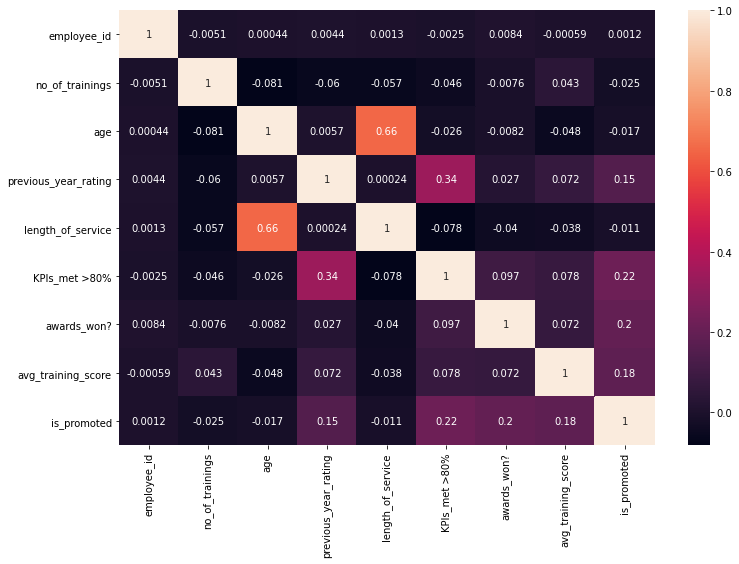

In [ ]:
#Plotting the correlation matrix - Heatmap
train_corr=train.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(train.corr(), annot = True)

In [ ]:
#Test-Train 
X_train = train[[ "department", "region", "education", "gender", "recruitment_channel", "no_of_trainings", "age", "previous_year_rating", 
                 'length_of_service',
                 "KPIs_met >80%", "awards_won?", "avg_training_score" ]]
y_train = train['is_promoted']
y_train = y_train.to_frame()

X_test = test[[ "department", "region", "education", "gender", "recruitment_channel", "no_of_trainings", "age", "previous_year_rating", 
               'length_of_service',
               "KPIs_met >80%", "awards_won?", "avg_training_score" ]]

# Binning
X_train['age'] = pd.cut( x=X_train['age'], bins=[20, 30, 39, 49], labels=['20', '30', '40'] )
X_test['age']  = pd.cut(x=X_test['age'], bins=[20, 30, 39, 49], labels=['20', '30', '40'] )

#Adding new features
X_train['Main_factors'] = X_train['KPIs_met >80%']+X_train['awards_won?']+X_train['avg_training_score']
X_test['Main_factors'] = X_test['KPIs_met >80%']+X_test['awards_won?']+X_test['avg_training_score']

In [ ]:
#display(X_train.isnull().sum())
#X_train.head(10)

In [ ]:
#One hot encoding function definition
def One_hot_encoder(encoding_data):
  encoding_data = pd.get_dummies(encoding_data)
  encoding_data.astype( 'float64' ).dtypes
  return encoding_data

In [ ]:
#one hot encoding of data
X_train_encode = One_hot_encoder(X_train)
X_test_encode =  One_hot_encoder(X_test)

X_train = X_train[["no_of_trainings", "previous_year_rating",'length_of_service', "KPIs_met >80%", "awards_won?", "avg_training_score",'Main_factors' ]]
X_test = X_test[["no_of_trainings", "previous_year_rating",'length_of_service', "KPIs_met >80%", "awards_won?", "avg_training_score",'Main_factors' ]]

X_train_encode = pd.concat([X_train,X_train_encode], axis=1)
X_test_encode = pd.concat([X_test,X_test_encode], axis=1)

In [ ]:
X_train_encode.head(10)

no_of_trainings  previous_year_rating  ...  age_30  age_40
0                1                   5.0  ...       1       0
1                1                   5.0  ...       0       0
2                1                   3.0  ...       1       0
3                2                   1.0  ...       1       0
4                1                   3.0  ...       0       1
5                2                   3.0  ...       1       0
6                1                   3.0  ...       1       0
7                1                   3.0  ...       1       0
8                1                   4.0  ...       0       0
9                1                   5.0  ...       1       0

[10 rows x 69 columns]

In [ ]:
#Normalizing the features
scaler = StandardScaler()
scaler.fit(X_train_encode)
X_train_encode = scaler.transform(X_train_encode)
X_test_encode = scaler.transform(X_test_encode)

In [ ]:
#Converting from numpy array to Pandas dataframe
X_train_encode=pd.DataFrame(X_train_encode)
X_test_encode=pd.DataFrame(X_test_encode)

In [ ]:
#Principal Component Analysis - reducing to 2 dimension and analysing the data
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_train_encode)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, train[['is_promoted']]], axis = 1)
principalComponents_y = pca.fit_transform(X_test_encode)

#Adding two new features to our dataset- Principal component 1&2
finalDf_x=finalDf[['principal component 1','principal component 2']]
finalDf_y = pd.DataFrame(data = principalComponents_y, columns = ['principal component 1', 'principal component 2'])
X_train_encode = pd.concat([finalDf_x,X_train_encode], axis=1)
X_test_encode = pd.concat([finalDf_y,X_test_encode], axis=1)

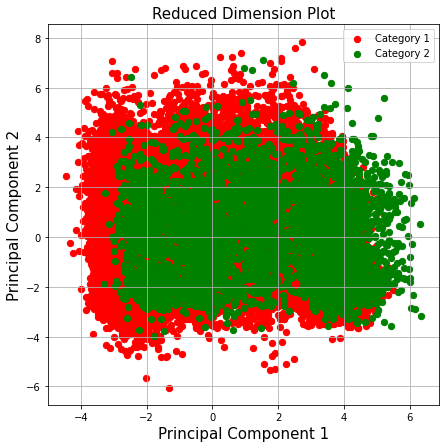

In [ ]:
#Visualzing the dimensionality reduced dataset and deciding on which model to use
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Reduced Dimension Plot', fontsize = 15)
targets = [0,1]
colours = ['r', 'g']
for target, colour in zip(targets,colours):
    indicesToKeep = finalDf['is_promoted'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = colour, s = 40)
ax.legend(['Category 1','Category 2'])
ax.grid()

In [ ]:
#Splitting into Train-Validation set
from sklearn.model_selection import train_test_split
X_train_encode, X_valid, y_train, y_valid = train_test_split(X_train_encode, y_train, test_size = 0.2, random_state = 0)

Multi-layer Perceptron classifier

In [ ]:
#Using Multi-layer Perceptron classifier
acc_mlp=[]
mlp_clf = MLPClassifier(hidden_layer_sizes=(16,), random_state=1, activation='relu',max_iter=1,verbose=True, warm_start=True)
for i in range(128):
  mlp_clf.fit(X_train_encode, y_train)
  acc_mlp.append(mlp_clf.score(X_valid,y_valid))

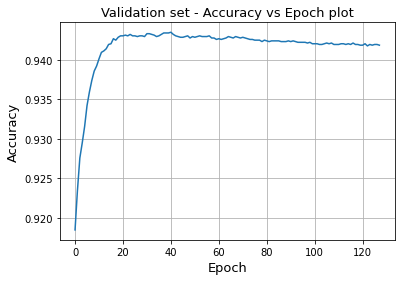

In [ ]:
plt.plot(acc_mlp)
plt.xlabel('Epoch', fontsize = 13) 
plt.ylabel('Accuracy', fontsize = 13) 
plt.title('Validation set - Accuracy vs Epoch plot', fontsize = 13) 
plt.grid(True) 
plt.show() 

In [ ]:

#Accuracy on validation set - MLP
print ("Highest accuracy on validation set - Multi-layer Perceptron classifier: "+ str(max(acc_mlp)))
maxacc_index = acc_mlp.index(max(acc_mlp))
print("Corresponding iteration step: ", maxacc_index)

Highest accuracy on validation set - Multi-layer Perceptron classifier: 0.9435322021528918
Corresponding iteration step:  40


In [ ]:
#Early Stopping - At highest accuracy achieved
mlp_clf = MLPClassifier(hidden_layer_sizes=(48,), random_state=1, activation='relu',max_iter=maxacc_index, warm_start=True)
mlp_clf.fit(X_train_encode, y_train)
y_pred=mlp_clf.predict(X_test_encode)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#MLP results dataframe and storing it in csv format
mlp_results = {'employee_id': test['employee_id'], 'is_promoted':y_pred}
df = pd.DataFrame(data=mlp_results)
pd.DataFrame(df).to_csv(r"sub_mlp"+".csv",index=False)

Decision Tree

In [ ]:
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train_encode, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

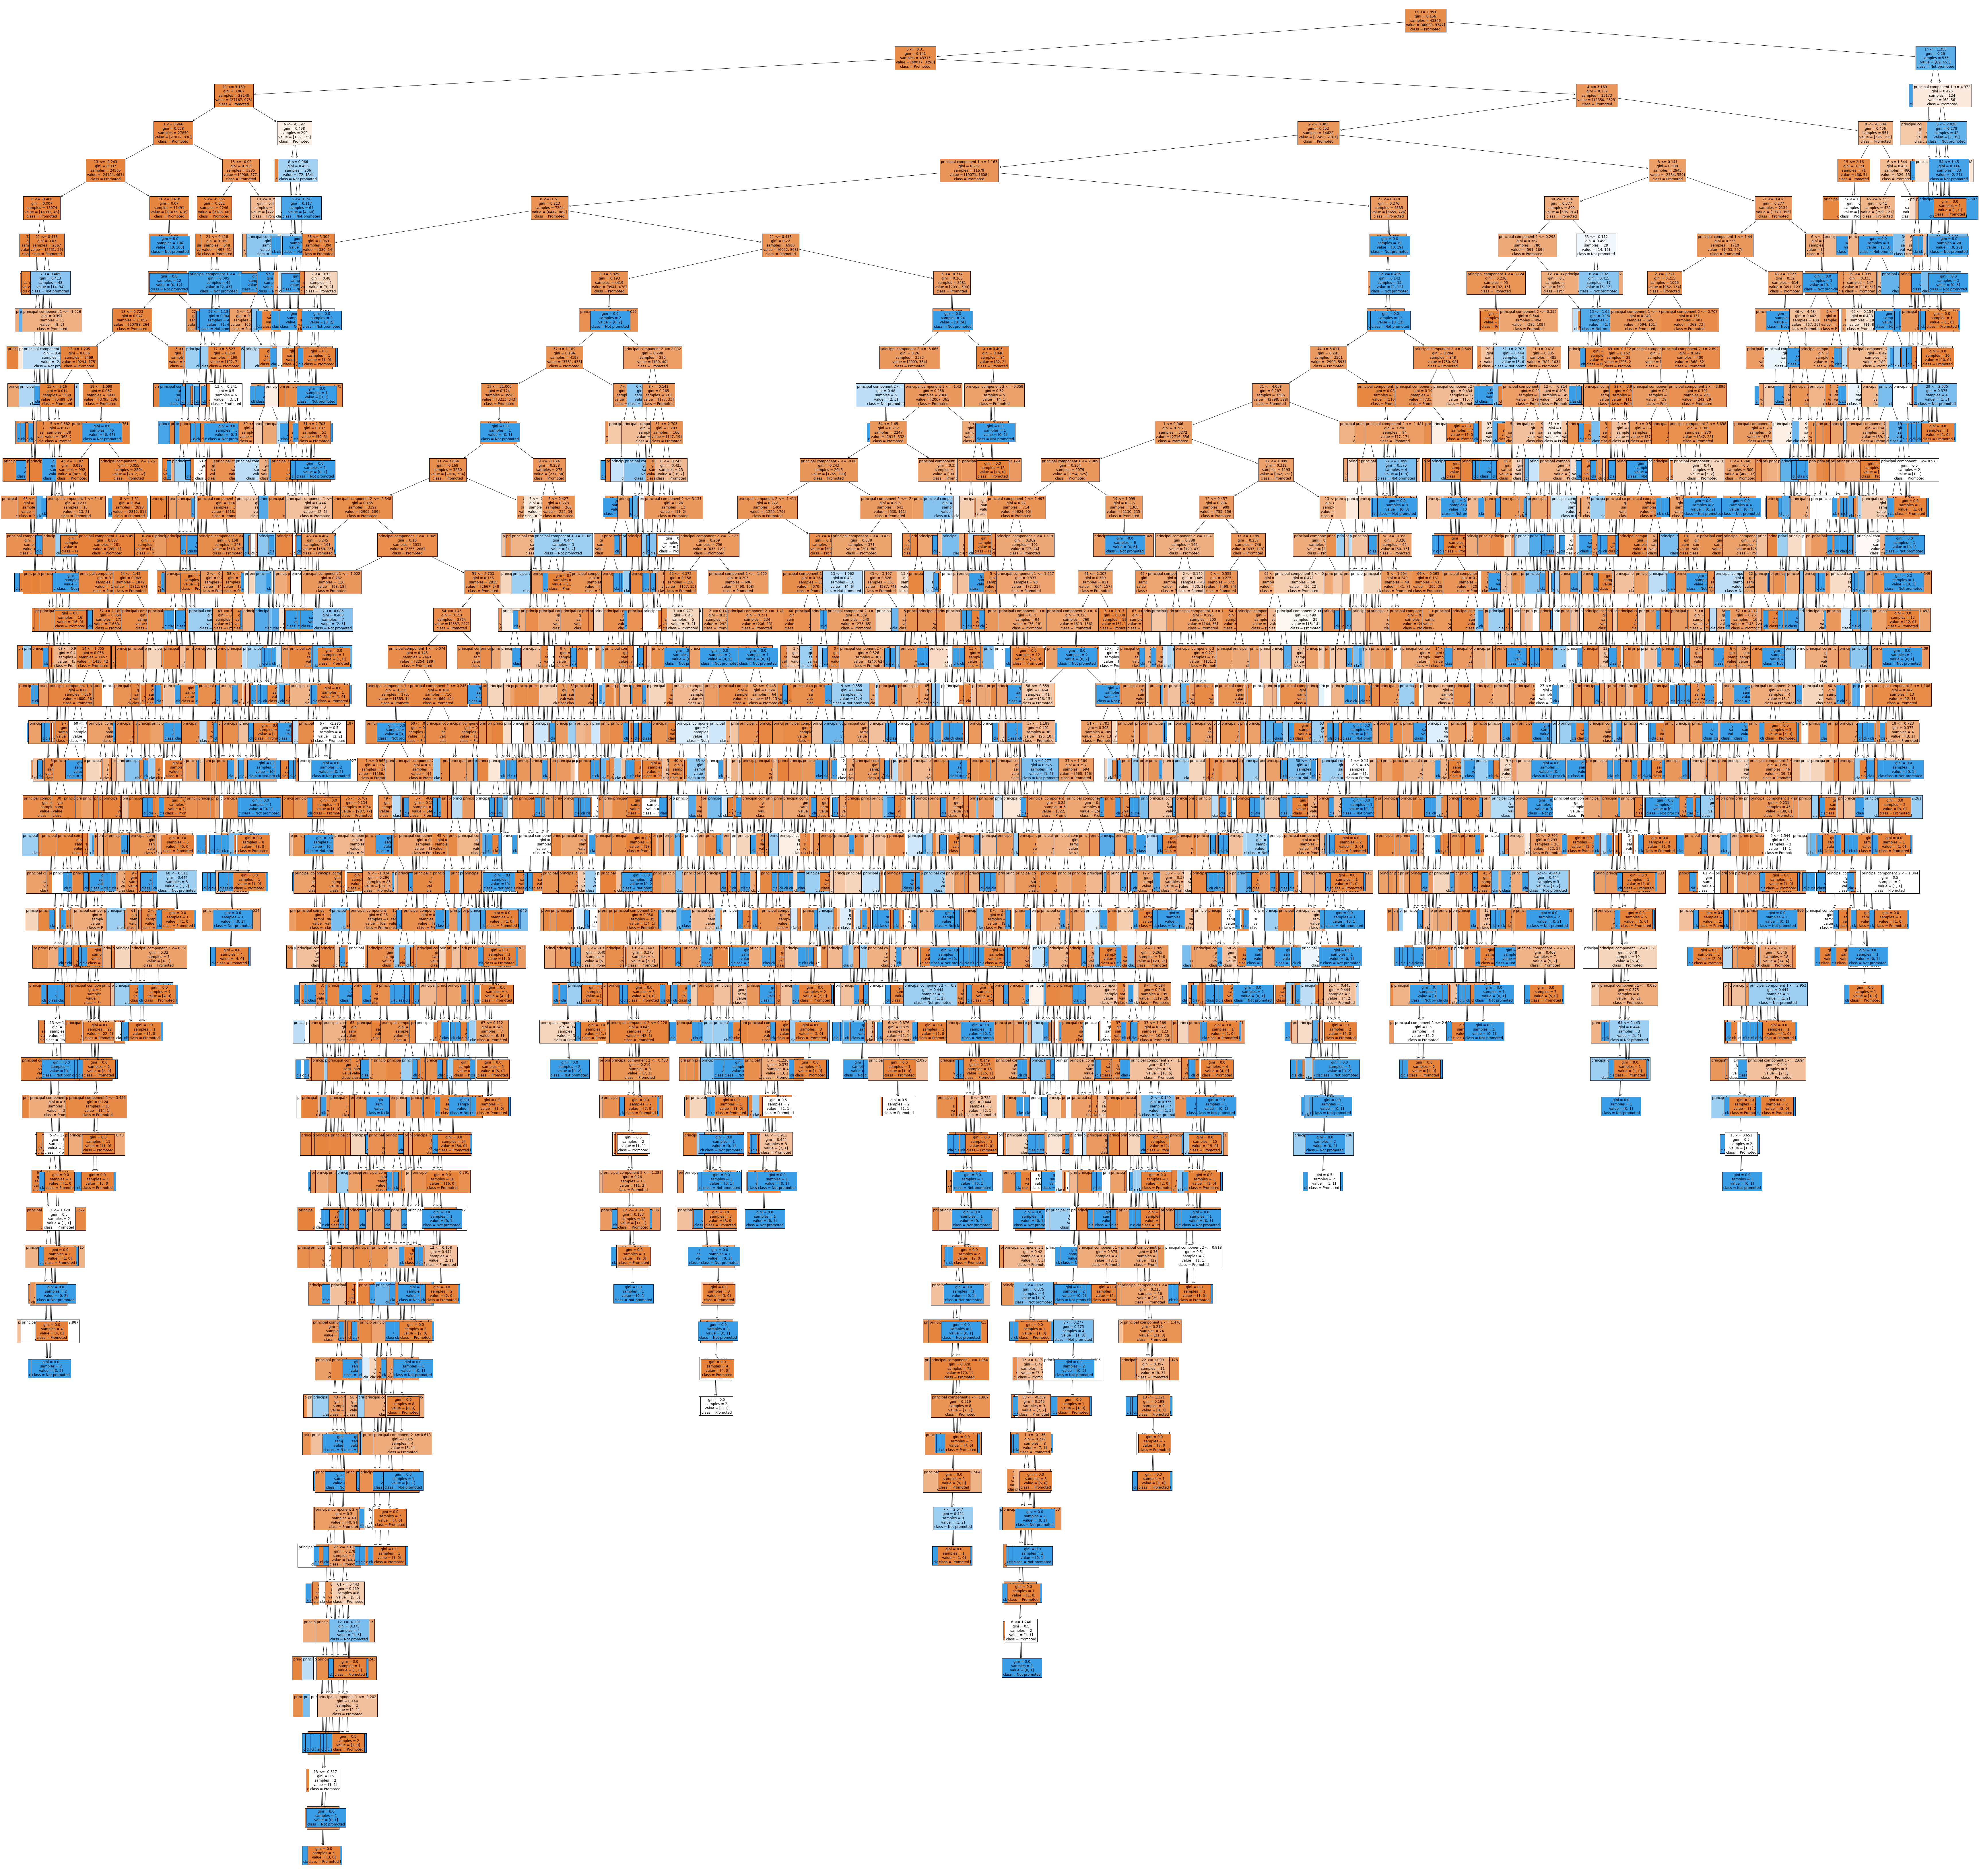

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(120,120))
a = plot_tree(dt_clf, feature_names=X_train_encode.columns, fontsize=12, filled=True, 
              class_names=['Promoted', 'Not promoted'])

In [ ]:
#Accuracy on validation set - DT
acc_dt = dt_clf.score(X_valid,y_valid)
print ("Accuracy on validation set - Decision tree classifier: "+ str(acc_dt))

Accuracy on validation set - Decision tree classifier: 0.9086845466155811


In [ ]:
y_DTpred = dt_clf.predict(X_test_encode)
#DT results dataframe and storing it in csv format
dt_results = {'employee_id': test['employee_id'], 'is_promoted':y_DTpred}
df = pd.DataFrame(data=dt_results)
pd.DataFrame(df).to_csv(r"sub_DT"+".csv",index=False)

Analysis

In [ ]:
if max(acc_mlp)>acc_dt:
  df = pd.read_csv('/content/sub_mlp.csv')
else:
  df = pd.read_csv('/content/sub_mlp.csv')

df.to_csv('high_acc_results.csv')

In [ ]:
result = pd.read_csv('/content/high_acc_results.csv')
test['is_promoted'] = result['is_promoted']
test.head()

employee_id         department  ... avg_training_score is_promoted
0         8724         Technology  ...                 77           0
1        74430                 HR  ...                 51           0
2        72255  Sales & Marketing  ...                 47           0
3        38562        Procurement  ...                 65           0
4        64486            Finance  ...                 61           0

[5 rows x 14 columns]

In [ ]:
promoted_df=test[test['is_promoted']==1]
promoted_df.head()

employee_id  department  ... avg_training_score is_promoted
32         67672  Technology  ...                 85           1
118        27495  Operations  ...                 69           1
122         3901  Technology  ...                 88           1
124        55735  Technology  ...                 81           1
139        63901          HR  ...                 66           1

[5 rows x 14 columns]

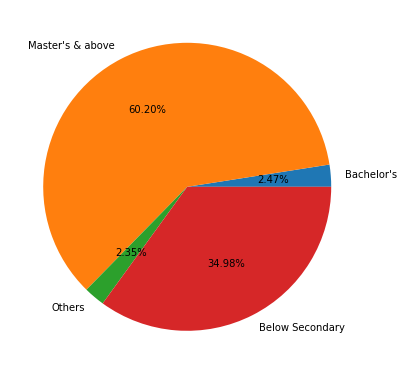

In [ ]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
#labels = list(test['education'].unique())
a=test.groupby(['education']).sum()
a=list(a['is_promoted'])
ax.pie(a, labels = ["Bachelor's", "Master's & above", "Others", 'Below Secondary'],autopct='%1.2f%%')
plt.show()

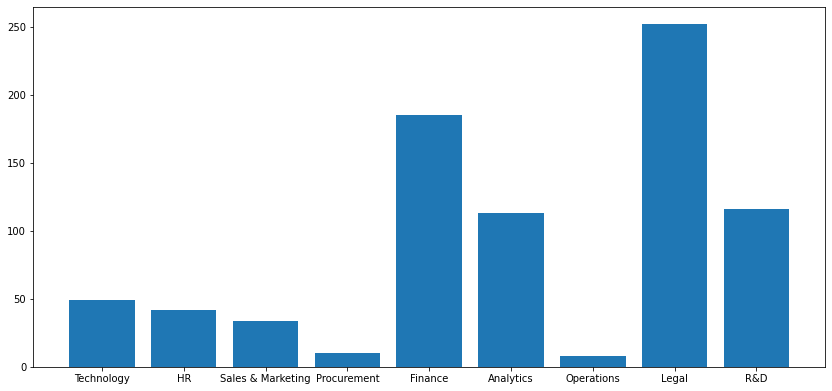

In [ ]:
fig = plt.figure(figsize = (11,5))
ax = fig.add_axes([0,0,1,1])
label_list = list(test['department'].unique())
a=test.groupby(['department']).sum()
a=list(a['is_promoted'])
ax.bar(label_list,a)
plt.show()

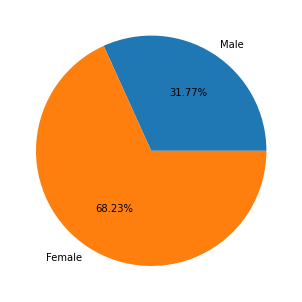

In [ ]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label_list = ['Male','Female']
a=test.groupby(['gender']).sum()
a=list(a['is_promoted'])
ax.pie(a, labels = label_list,autopct='%1.2f%%')
plt.show()

GUI APPLICATION IN JUPYTER NOTEBOOK
